# Laboratory 05

## Exercise 1
• A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.

### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

In [45]:
## Binomial distribution with a success probability p.
likelihood <- function(k,size,p){dbinom(k,size,p)}

### b) Assuming a uniform prior, what is the posterior distribution for y?

In [46]:
prior <- dunif
posterior <- function(x){likelihood(29,150,x)*prior(x)}

### c) Plot both posterior and likelihood ditributions functions

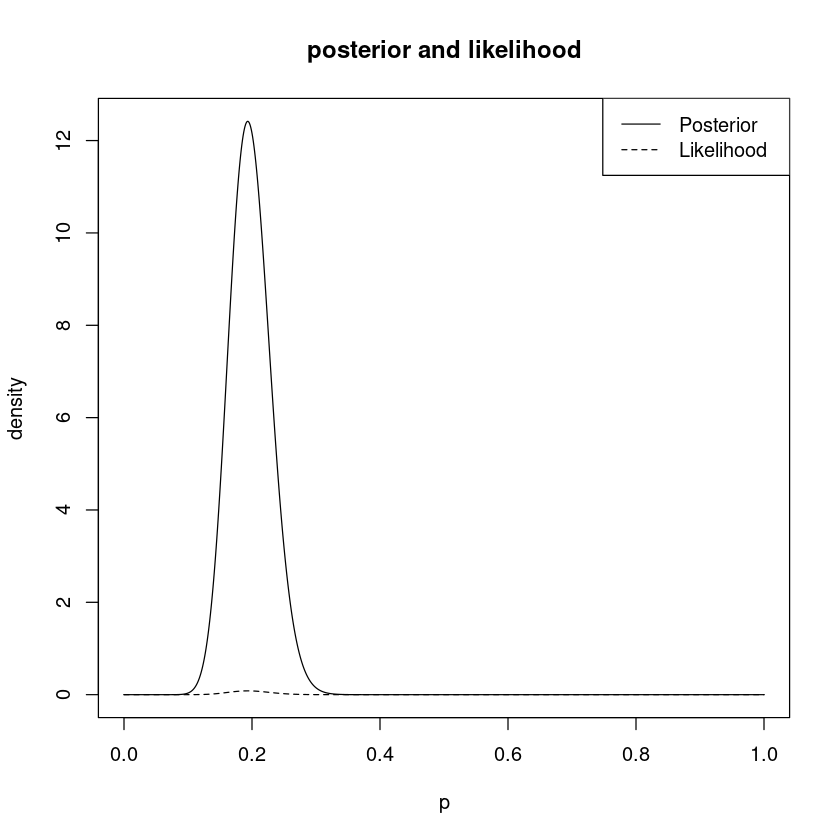

In [47]:
x <- seq(0,1,0.001)
c <- integrate(posterior,0,1)$value
plot(x, posterior(x)/c, main = 'posterior and likelihood', ylab = 'density', xlab = 'p', lty = 1, type = 'l')
lines(x,likelihood(29,150,x), lty = 2)
legend("topright",legend = c("Posterior","Likelihood"), lty =1:2)

In [48]:
# Should likelihood be normalized?
integrate(function(x){likelihood(29,150,x)},0,1)

0.006622517 with absolute error < 8.5e-06

## Exercise 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

- Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

- Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.

- Chris believes that his prior should have a trapezoidal shape:

$$
\begin{align}
f(X)=\left\{
    \begin{array}\\
    20x,\ &0\le x\lt 0.1\\
    2,\ &0.1\le x\lt 0.3\\
    5-10x,\ &0.3\le x\lt 0.5\\
    0,\ &x\ge 0.5
    \end{array}\right.
\end{align}
$$


### a) Draw and compare the three prior distributions.

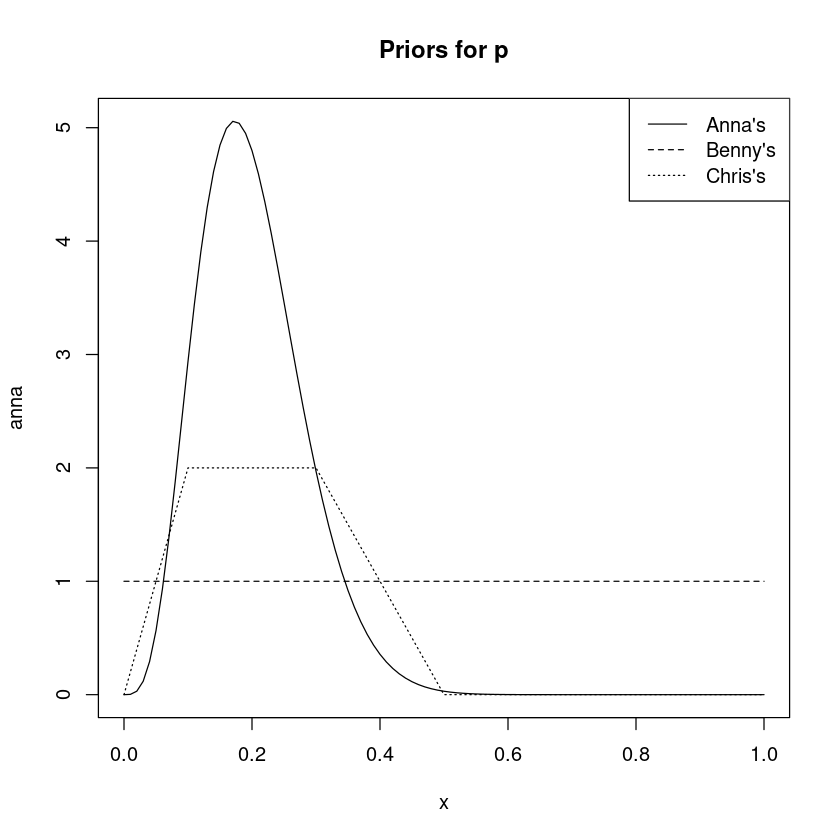

In [49]:
# After some algebra, we get that a beta distributions parameters are given as:
mu =0.2
sig = 0.08
alph <- (mu**2-mu**3-mu*sig**2)/sig**2
bet <- sig**2*(alph**2+alph)/(mu**2-sig**2*alph)

anna <- function(x){dbeta(x,alph,bet)}

benny <- function(x){dunif(x)}

chris <- function(x){
    if(x >= 0.5 | x < 0){
        return(0)
    }
    if(x>=0.3){
        return(5-10*x)
    }
    if(x >= 0.1){
        return(2)
    }
    return(20*x)
}
x <- seq(0,1,0.01)
chris<- Vectorize(chris)

plot(anna, lty = 1, main = "Priors for p")
lines(x,benny(x), lty =2)
lines(x, chris(x), lty = 3)
legend("topright",legend = c("Anna's","Benny's", "Chris's"), lty =1:3)

In [50]:
integrate(chris,0,1)

0.6999994 with absolute error < 8.5e-05

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### b) Evaluate and draw the three posterior distributions.

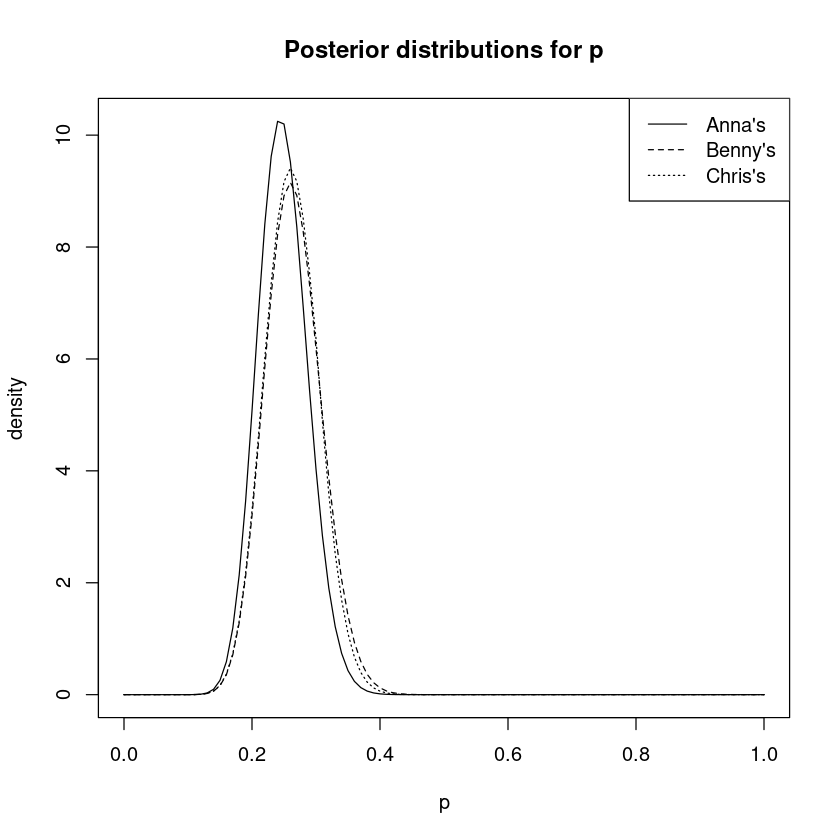

In [51]:
# we set a binomial distribution for the likelihood
likelihood <- function(p){dbinom(26,100,p)}

post_dist <- function(likelihood,prior_dist){
    pre_post <- function(x){likelihood(x)*prior_dist(x)}
    c_post <- 1/integrate(pre_post,0,1)$value
    return(function(x){c_post*pre_post(x)})
}


post_anna <- post_dist(likelihood,anna)
post_benny <- post_dist(likelihood,benny)
post_chris <- post_dist(likelihood,chris)

plot(post_anna, main = 'Posterior distributions for p', lty = 1, ylab ='density', xlab = 'p')
lines(x,post_benny(x), lty = 2)
lines(x,post_chris(x), lty = 3)
legend("topright",legend = c("Anna's","Benny's", "Chris's"), lty =1:3)

### c)  Give an estimate of the most probable value and the 95% credibility interval

In [86]:
find_ci <- function(c.i.,post,low,high){
    x <- seq(low,high,0.01)
    best_x <- x[which.max(post(x))]
    low_c <- (low+best_x)/2
    high_c <- (high+best_x)/2
    c <- integrate(post,low_c,high_c)$value
    while(abs(c-c.i.) > 0.005){
        # The reference value is the best_x if the confidence is higher,
        # Otherwise, it is the lower or upper bound.
        # Therefore, the interval extremes may go closer to best_x
        # if the confidence is higher than desired
        # and further from it otherwise
        ref_low <- low*(c<c.i.)+best_x*(c>c.i.)
        ref_high <- ifelse(ref_low ==low,high,best_x)
        
        # we randomly choose whether to modify both or a single one of the bounds
        modify <- sample(3,1)
        # If modify is 1 or 2, low_c is updated
        low_c <- (modify < 3)*(ref_low + low_c)/2+(modify == 3)*low_c
        # If modify is 2 or 3, high_c is updated
        high_c <- (modify > 1)*(ref_high + high_c)/2+(modify == 1)*high_c
        c <- integrate(post,low_c,high_c)$value
    }
    return(c(low_c,high_c,best_x))
}

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:
$$
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
$$

In [18]:
T <- 1
H <- 0
flips <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)

### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [28]:
flat_prior <- dunif
beta_prior <- function(x){dbeta(x,5,5)}
## Once again, we use a binomial likelihood
likelihood <- function(k,size,p){dbinom(k,size,p)}

post_dist <- function(likelihood,prior_dist){
    pre_post <- function(x){likelihood(x)*prior_dist(x)}
    c_post <- 1/integrate(pre_post,0,1)$value
    return(function(x){c_post*pre_post(x)})
}

flat_post <- post_dist(function(x){likelihood(sum(flips),length(flips),x)},flat_prior)
beta_post <- post_dist(function(x){likelihood(sum(flips),length(flips),x)},beta_prior)



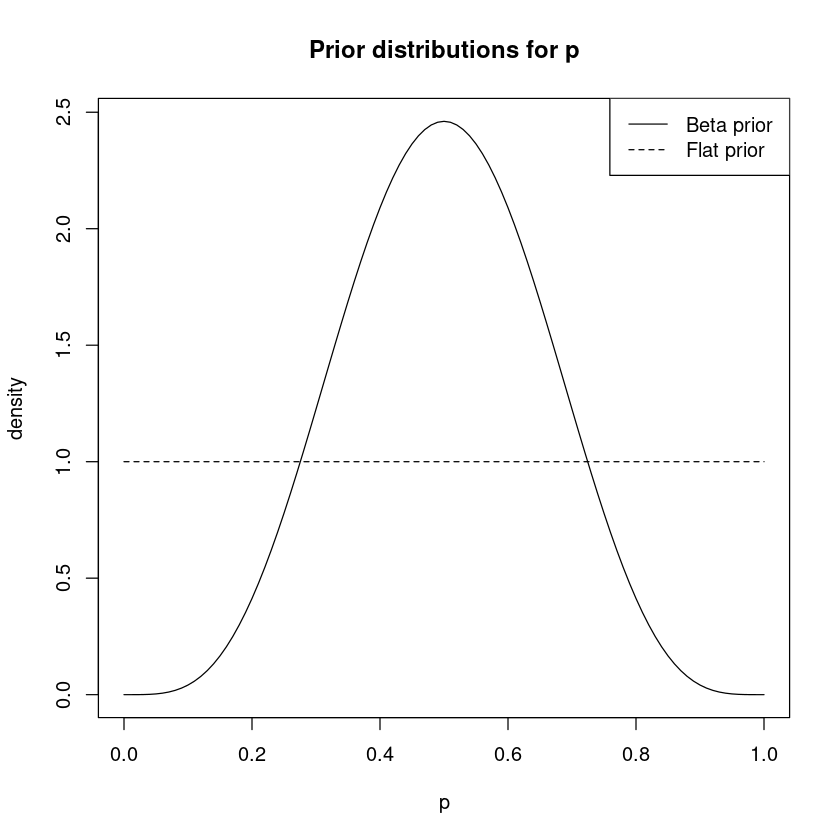

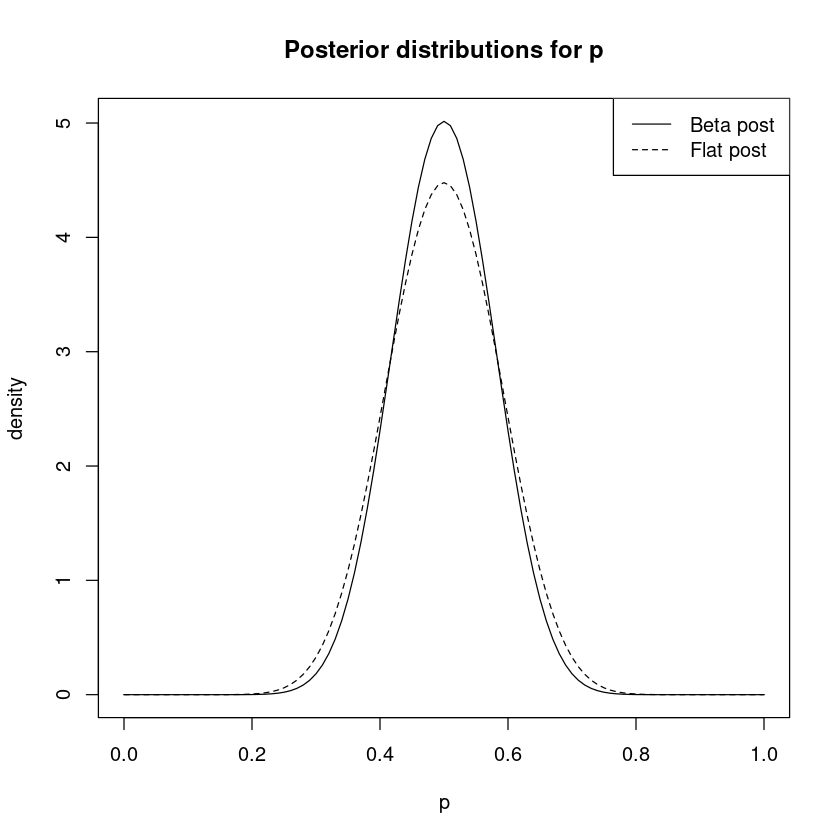

In [29]:
x <- seq(0,1,0.01)
plot(beta_prior, main = 'Prior distributions for p', lty = 1, ylab ='density', xlab = 'p')
lines(x,flat_prior(x), lty = 2)
legend("topright",legend = c("Beta prior","Flat prior"), lty =1:2)
plot(beta_post, main = 'Posterior distributions for p', lty = 1, ylab ='density', xlab = 'p')
lines(x,flat_post(x), lty = 2)
legend("topright",legend = c("Beta post","Flat post"), lty =1:2)

### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [27]:
i <- which.max(beta_post(x))
j <- which.max(flat_post(x))
x[i]; x[j]

[1] 0.5

[1] 0.5

### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [37]:
prior <- beta_prior 
for(flip in rev(flips)){
    prior <- post_dist(function(x){likelihood(flip,1,x)},prior)
    print(x[which.max(prior(x))])
}

[1] 0.44
[1] 0.4
[1] 0.36
[1] 0.67
[1] 0.31
[1] 0.71
[1] 0.27
[1] 0.75
[1] 0.24
[1] 0.22
[1] 0.79
[1] 0.2
[1] 0.81
[1] 0.18
[1] 0.83
[1] 0.17
[1] 0.16
[1] 0.15
[1] 0.85
[1] 0.86
[1] 0.14
[1] 0.13
[1] 0.87
[1] 0.87
[1] 0.12
[1] 0.88
[1] 0.89
[1] 0.89
[1] 0.89
[1] 0.89


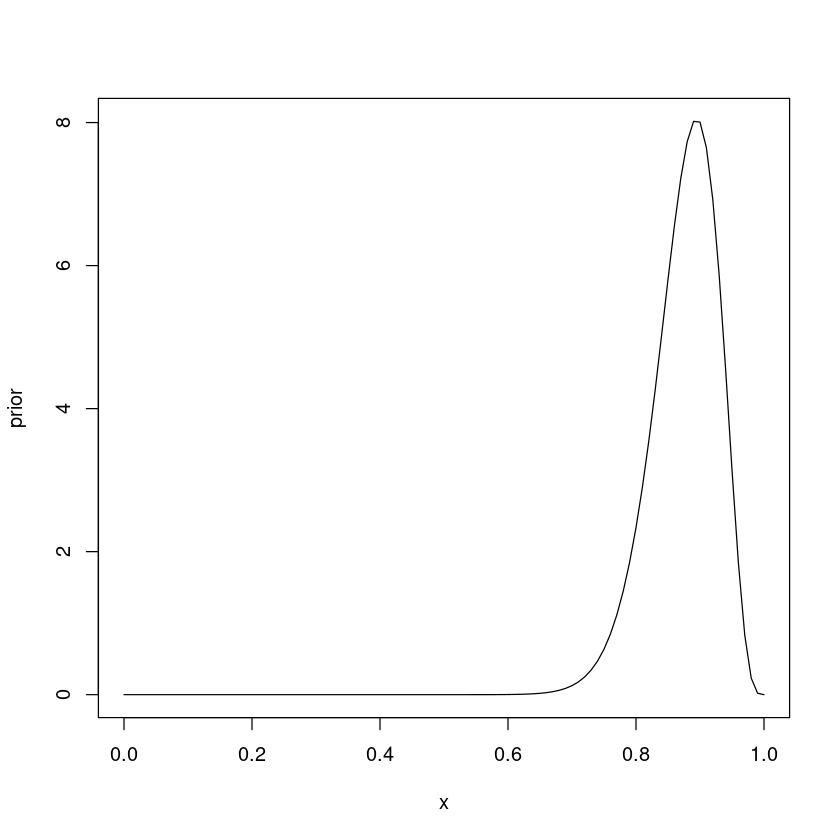

In [38]:
plot(prior)

### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

In [36]:
rev

function (x) 
UseMethod("rev")
<bytecode: 0x56369e1b0968>
<environment: namespace:base>